## 사전 설치

4분 소요

In [1]:
#@title
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio translate

from diffusers import StableDiffusionPipeline, DDIMScheduler
import torch

model_id = "Linaqruf/anything-v3.0"
branch_name= "diffusers"

# scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    # scheduler=scheduler,
    revision=branch_name,
    torch_dtype=torch.float16)
pipe = pipe.to("cuda")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 27.9 MB/s 
     |████████████████████████████████| 191 kB 66.7 MB/s 
     |████████████████████████████████| 33.8 MB 1.3 MB/s 
     |████████████████████████████████| 92.2 MB 47 kB/s 
     |████████████████████████████████| 13.8 MB 40.2 MB/s 
     |████████████████████████████████| 182 kB 65.6 MB/s 
     |████████████████████████████████| 7.6 MB 43.8 MB/s 
     |████████████████████████████████| 278 kB 67.9 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 2.3 MB 40.3 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 106 kB 71.0 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████

Need to compile C++ extensions to get sparse attention suport. Please run python setup.py build develop
Error caught was: No module named 'triton'


/usr/local/lib/python3.8/dist-packages/xformers/_C.so: undefined symbol: _ZNK3c104impl13OperatorEntry20reportSignatureErrorENS0_12CppSignatureE


Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/552 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

## 만들기

Prompt: Christmas tree, best quality, CG, wallpaper, HDR, high quality, high definition, extremely detailed
Negative Prompt: boygirllowres, (bad anatomy, bad hands:1.1), text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, b&w, weird colors, (cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5), (disfigured, deformed, extra limbs:1.5)
Seed: 376818383
Steps: 50
CFG scale: 12
Width: 512
Height: 512



  0%|          | 0/50 [00:00<?, ?it/s]

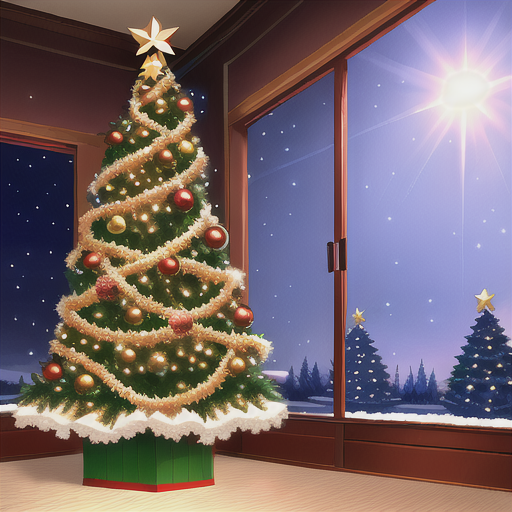

In [23]:
prompt_list = [
    'Christmas tree',
    'best quality',
    'CG',
    'wallpaper',
    'HDR',
    'high quality',
    'high definition',
    'extremely detailed',
]

negative_prompt_list = [
    'boy'
    'girl'
    'lowres',
    '(bad anatomy, bad hands:1.1)',
    'text',
    'error',
    'missing fingers',
    'extra digit',
    'fewer digits',
    'cropped',
    'worst quality',
    'low quality',
    'normal quality',
    'jpeg artifacts',
    'signature',
    'watermark',
    'username',
    'blurry',
    'artist name',
    'b&w',
    'weird colors',
    '(cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5)',
    '(disfigured, deformed, extra limbs:1.5)'
]

seed = 376818383

num_inference_steps = 50 # 25
guidance_scale = 12 # 7.5
width = 512
height = 512

prompt = ', '.join(prompt_list)
negative_prompt = ', '.join(negative_prompt_list)

print(f'''Prompt: {prompt}
Negative Prompt: {negative_prompt}
Seed: {seed}
Steps: {num_inference_steps}
CFG scale: {guidance_scale}
Width: {width}
Height: {height}
''')

image = pipe(
    prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    width = width,
    height = height,
    generator = torch.Generator('cuda').manual_seed(seed) if seed != 0 else None
).images[0]

image

Prompt: (cozy bedroom), desk, chair, bookshelves, curtains, big windows, masterpiece, best quality, CG, wallpaper, HDR, high quality, high definition, extremely detailed
Negative Prompt: lowres, (bad anatomy, bad hands:1.1), text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, b&w, weird colors, (cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5), (disfigured, deformed, extra limbs:1.5)
Seed: 18273188
Steps: 50
CFG scale: 12
Width: 768
Height: 512



  0%|          | 0/50 [00:00<?, ?it/s]

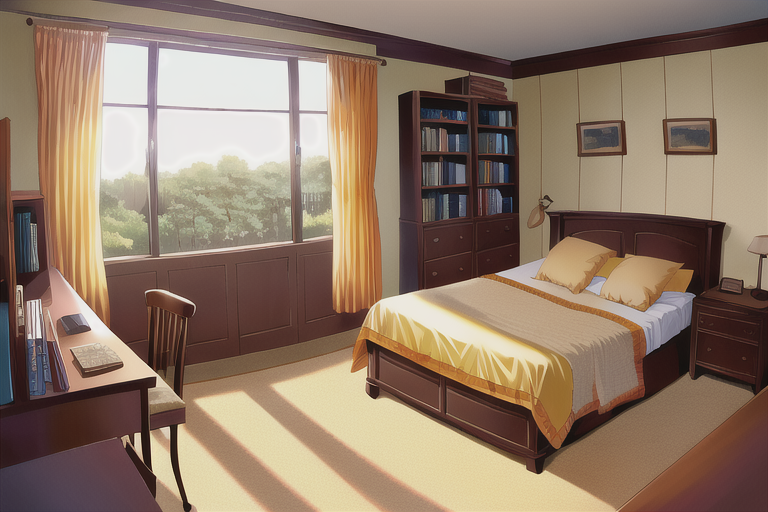

In [ ]:
prompt_list = [
    '(cozy bedroom)',
    'desk',
    'chair',
    'bookshelves',
    'curtains',
    'big windows',
    'masterpiece',
    'best quality',
    'CG',
    'wallpaper',
    'HDR',
    'high quality',
    'high definition',
    'extremely detailed',
]

negative_prompt_list = [
    'lowres',
    '(bad anatomy, bad hands:1.1)',
    'text',
    'error',
    'missing fingers',
    'extra digit',
    'fewer digits',
    'cropped',
    'worst quality',
    'low quality',
    'normal quality',
    'jpeg artifacts',
    'signature',
    'watermark',
    'username',
    'blurry',
    'artist name',
    'b&w',
    'weird colors',
    '(cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5)',
    '(disfigured, deformed, extra limbs:1.5)'
]

seed = 18273188

num_inference_steps = 50 # 25
guidance_scale = 12 # 7.5
width = 768
height = 512

prompt = ', '.join(prompt_list)
negative_prompt = ', '.join(negative_prompt_list)

print(f'''Prompt: {prompt}
Negative Prompt: {negative_prompt}
Seed: {seed}
Steps: {num_inference_steps}
CFG scale: {guidance_scale}
Width: {width}
Height: {height}
''')

image = pipe(
    prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    width = width,
    height = height,
    generator = torch.Generator('cuda').manual_seed(seed) if seed != 0 else None
).images[0]

image

Prompt: 1boy, medium hair, blonde hair, blue eyes, bishounen, colorful, autumn, cumulonimbus clouds, lighting, blue sky, falling leaves, garden, masterpiece, best quality, CG, wallpaper, HDR, high quality, high definition, extremely detailed
Negative Prompt: lowres, (bad anatomy, bad hands:1.1), text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, b&w, weird colors, (cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5), (disfigured, deformed, extra limbs:1.5)
Seed: 51212655
Steps: 50
CFG scale: 12
Width: 768
Height: 512



  0%|          | 0/50 [00:00<?, ?it/s]

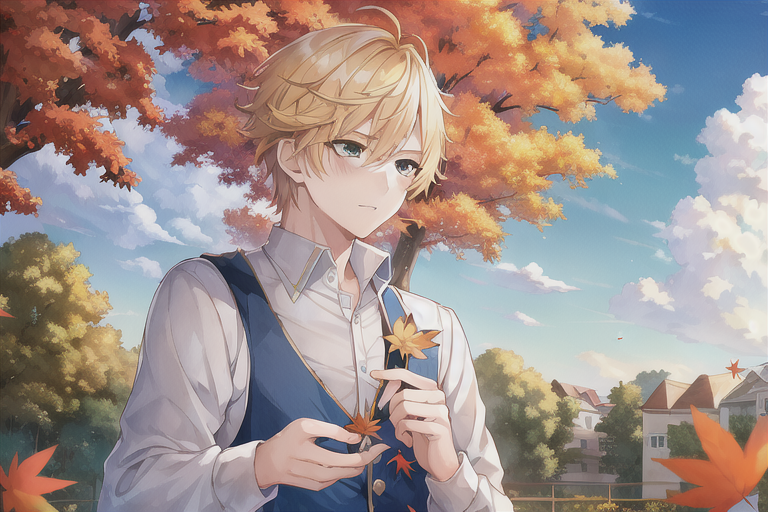

In [ ]:
prompt_list = [
    '1boy',
    'medium hair',
    'blonde hair',
    'blue eyes',
    'bishounen',
    'colorful',
    'autumn',
    'cumulonimbus clouds',
    'lighting',
    'blue sky',
    'falling leaves',
    'garden',
    'masterpiece',
    'best quality',
    'CG',
    'wallpaper',
    'HDR',
    'high quality',
    'high definition',
    'extremely detailed',
]

negative_prompt_list = [
    'lowres',
    '(bad anatomy, bad hands:1.1)',
    'text',
    'error',
    'missing fingers',
    'extra digit',
    'fewer digits',
    'cropped',
    'worst quality',
    'low quality',
    'normal quality',
    'jpeg artifacts',
    'signature',
    'watermark',
    'username',
    'blurry',
    'artist name',
    'b&w',
    'weird colors',
    '(cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5)',
    '(disfigured, deformed, extra limbs:1.5)'
]

seed = 51212655

num_inference_steps = 50 # 25
guidance_scale = 12 # 7.5
width = 768
height = 512

prompt = ', '.join(prompt_list)
negative_prompt = ', '.join(negative_prompt_list)

print(f'''Prompt: {prompt}
Negative Prompt: {negative_prompt}
Seed: {seed}
Steps: {num_inference_steps}
CFG scale: {guidance_scale}
Width: {width}
Height: {height}
''')

image = pipe(
    prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    width = width,
    height = height,
    generator = torch.Generator('cuda').manual_seed(seed) if seed != 0 else None
).images[0]

image

# 여러분! 메리 크리스마스🎄